In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("data.csv")
df.head(5)

Text      Intent
0        how are you  small_talk
1          what's up  small_talk
2  how are you doing  small_talk
3    how about today  small_talk
4     how are things  small_talk

In [27]:
df.Intent.value_counts()

small_talk    101
thanks        100
help          100
quit           97
Name: Intent, dtype: int64

In [28]:
df.isna().sum()

Text      0
Intent    0
dtype: int64

In [29]:
intent = df.Intent.map({
    "small_talk": 0,
    "quit": 1,
    "thanks": 2,
    "help": 3
})

intent

0      0
1      0
2      0
3      0
4      0
      ..
393    3
394    3
395    3
396    3
397    3
Name: Intent, Length: 398, dtype: int64

In [30]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [31]:
def preprocess(text):
    doc = nlp(text)

    filter_word = []

    for token in doc:
        # if token.is_stop or token.is_punct:
        #     continue
        if token.is_punct:
            continue
        filter_word.append(token.lemma_)

    return " ".join(filter_word)

In [32]:
text = df.Text.apply(preprocess)

In [33]:
text

0                       how be you
1                       what be up
2                    how be you do
3                  how about today
4                     how be thing
                  ...             
393    could someone help I please
394                           help
395      I be stick can you help I
396                    I need help
397                  help I please
Name: Text, Length: 398, dtype: object

In [34]:
df1 = pd.concat([text, intent], axis="columns")

In [35]:
df1

Text  Intent
0                     how be you       0
1                     what be up       0
2                  how be you do       0
3                how about today       0
4                   how be thing       0
..                           ...     ...
393  could someone help I please       3
394                         help       3
395    I be stick can you help I       3
396                  I need help       3
397                help I please       3

[398 rows x 2 columns]

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
v = CountVectorizer(ngram_range=(1, 2))

x = v.fit_transform(df1.Text.values).toarray()

In [38]:
y = df1.Intent

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=df1.Intent)

## Machine Learning

In [40]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.90      0.95        20
           2       0.95      1.00      0.98        20
           3       0.95      1.00      0.98        20

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [41]:
# import joblib

# Save the model
# joblib.dump(model, "intent_classification_model")

Text(45.722222222222214, 0.5, 'Truth')

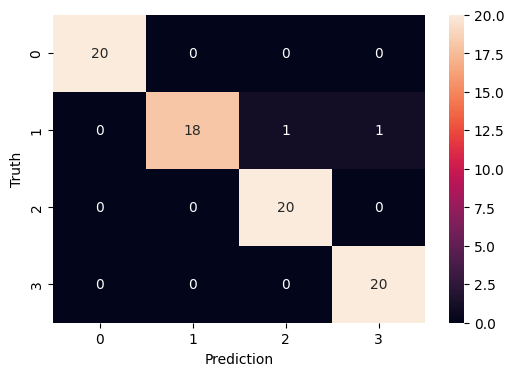

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [43]:
from  sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.7125
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.60      0.90      0.72        20
           2       0.88      0.35      0.50        20
           3       0.75      0.75      0.75        20

    accuracy                           0.71        80
   macro avg       0.75      0.71      0.69        80
weighted avg       0.75      0.71      0.69        80



In [44]:
from  sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.95
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.83      1.00      0.91        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20

    accuracy                           0.95        80
   macro avg       0.96      0.95      0.95        80
weighted avg       0.96      0.95      0.95        80



In [48]:
from  sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.975
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00        20
           3       0.95      1.00      0.98        20

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [63]:
{
    "small_talk": 0,
    "quit": 1,
    "thanks": 2,
    "help": 3
}

phrases = "Cheerio"

phrases_t = v.transform([preprocess(phrases)]).toarray()
print(model.predict(phrases_t))
print(model.predict_proba(phrases_t))

[1]
[[0. 1. 0. 0.]]


In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.975
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.91      1.00      0.95        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



## Deep Learning